# AUTO INSURANCE DATASET
 Using the Autoinsurance Dataset to carry out hierarchical clustering to segmentize the policy holders into differnt groups to carry out analysis.

## BUSINESS OBJECTIVE
* Maximize Service quality
* Identify Customer segments
* Maximize profits and revenue
* Minimize churn rate
* Identify influencing factors

## CONSTRAINTS
* Regulatory and Technical constraints
* Driving Habits
* Natural Calamities

## DATA DICTIONARY

| **slno** |      **Name of Feature**      | **Description**                                                                                                                                                                                           | **Type** | **Relevance** |
|:--------:|:------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
|     1    | Customer                      | Customer ID, it is unique value                                                                                                                                                                           | Nominal  | Irrelevant    |
|     2    | State                         | There are five location where customers live in states   (Washington,Arizona, Nevada, California, Oregon)                                                                                                 | Nominal  | Relevant      |
|     3    | Customer Lifetime Value       | Value of customers insurance                                                                                                                                                                              | Ratio    | Relevant      |
|     4    | Response                      | This will be our dependent variable. with categorical response “Yes” if   the customers would like to renew their insurance and “No” if the customers   would discontinue their insurance.                | Binary   | Relevant      |
|     5    | Coverage                      | There are 3 types of coverage insurances (Basic, Extended and Premium)                                                                                                                                    | Ordinal  | Relevant      |
|     6    | Education                     | Background education of customers (High School or Below, Bachelor,   College, Master and Doctor)                                                                                                          | Ordinal  | Relevant      |
|     7    | Effective To Date             | The first date when customer would like to actived their car insurance                                                                                                                                    | Interval | Irrelevant    |
|     8    | EmploymentStatus              |  Customer employemen status whether   they are Employed, Unemployed, Medical Leave, Disabled, or Retired                                                                                                  | Nominal  | Relevant      |
|     9    | Gender                        |  F for Female and M for Male                                                                                                                                                                              | Binary   | Relevant      |
|    10    | Income                        |  Customers income                                                                                                                                                                                         | Ratio    | Relevant      |
|    11    | Location Code                 |  Where the customers live likes in   Rural, Suburban, and Urban.                                                                                                                                          | Nominal  | Relevant      |
|    12    | Marital Status                |  Customer marital status (Divorced,   Married or Single)                                                                                                                                                  | Nominal  | Relevant      |
|    13    | Monthly Premium Auto          |  Premium auto that customers need   to pay every month                                                                                                                                                    | Ratio    | Relevant      |
|    14    | Months Since Last Claim       |  Number of months since customers   did last claim                                                                                                                                                        | Ratio    | Relevant      |
|    15    | Months Since Policy Inception |  Number of months since customers   did policy inception                                                                                                                                                  | Ratio    | Relevant      |
|    16    | Number of Open Complaints     |  Number of complaints                                                                                                                                                                                     | Ratio    | Relevant      |
|    17    | Number of Policies            |  Number of policies in when   customers take part of car insurance                                                                                                                                        | Ratio    | Relevant      |
|    18    | Policy Type                   | There are three type of policies in car insurance (Corporate Auto,   Personal Auto, and Special Auto)                                                                                                     | Nominal  | Relevant      |
|    19    | Policy                        | 3 variety of policies in insurance. There are three policies in each   policy types (Corporate L3, Corporate L2, Corporate L1, Personal L3,Personal   L2, Personal L1,Special L3, Special L2, Special L1) | Nominal  | Relevant      |
|    20    | Renew Offer Type              | Each sales of Car Insurance offer 4 type of new insurances to customers.   There are Offer 1, Offer 2, Offer 3 and Offer 4                                                                                | Nominal  | Relevant      |
|    21    | Sales Channel                 | Each sales offer new car insurance by Agent, Call Center, Web and Branch                                                                                                                                  | Nominal  | Relevant      |
|    22    | Total Claim Amount            | Number of Total Claim Amount when customer did based on their coverage   and other considerations.                                                                                                        | Ratio    | Relevant      |
|    23    | Vehicle Class                 | Type of vehicle classes that customers have Two-Door Car, Four-Door Car   SUV, Luxury SUV, Sports Car, and Luxury Car                                                                                     | Nominal  | Relevant      |
|    24    | Vehicle Size                  | Type of customers vehicle size, there are small, medium and large                                                                                                                                         | Ordinal  | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from feature_engine.outliers import Winsorizer
from termcolor import colored


Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass6\AutoInsurance.csv")
df=df0.copy()
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### EXPLORATORY DATA ANALYSIS

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(9134, 24)

In [4]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
print(colored("Descriptive Statistics of Categorical Columns:\n\n",'blue',attrs=['bold']),df.describe(include='object').T)

Descriptive Statistics of Categorical Columns:

                   count unique            top  freq
Customer           9134   9134        BU79786     1
State              9134      5     California  3150
Response           9134      2             No  7826
Coverage           9134      3          Basic  5568
Education          9134      5       Bachelor  2748
Effective To Date  9134     59      10/1/2011   195
EmploymentStatus   9134      5       Employed  5698
Gender             9134      2              F  4658
Location Code      9134      3       Suburban  5779
Marital Status     9134      3        Married  5298
Policy Type        9134      3  Personal Auto  6788
Policy             9134      9    Personal L3  3426
Renew Offer Type   9134      4         Offer1  3752
Sales Channel      9134      4          Agent  3477
Vehicle Class      9134      6  Four-Door Car  4621
Vehicle Size       9134      3        Medsize  6424


Checking the Number of Duplicates in the Dataset.

In [8]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number of Missing Values in the Dataset.

In [9]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Customer                         0
State                            0
Vehicle Class                    0
Total Claim Amount               0
Sales Channel                    0
Renew Offer Type                 0
Policy                           0
Policy Type                      0
Number of Policies               0
Number of Open Complaints        0
Months Since Policy Inception    0
Months Since Last Claim          0
Monthly Premium Auto             0
Marital Status                   0
Location Code                    0
Income                           0
Gender                           0
EmploymentStatus                 0
Effective To Date                0
Education                        0
Coverage                         0
Response                         0
Customer Lifetime Value          0
Vehicle Size                     0
dtype: int64


In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [11]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15768\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Customer Lifetime Value           8004.940475
Income                           37657.380009
Monthly Premium Auto                93.219291
Months Since Last Claim             15.097000
Months Since Policy Inception       48.064594
Number of Open Complaints            0.384388
Number of Policies                   2.966170
Total Claim Amount                 434.088794
dtype: float64

In [12]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15768\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Customer Lifetime Value           5780.182197
Income                           33889.500000
Monthly Premium Auto                83.000000
Months Since Last Claim             14.000000
Months Since Policy Inception       48.000000
Number of Open Complaints            0.000000
Number of Policies                   2.000000
Total Claim Amount                 383.945434
dtype: float64

In [13]:
stats.mode(df)

ModeResult(mode=array([['AA10041', 'California', 2004.350666, 'No', 'Basic', 'Bachelor',
        '10/1/2011', 'Employed', 'F', 0, 'Suburban', 'Married', 65, 3,
        59, 0, 1, 'Personal Auto', 'Personal L3', 'Offer1', 'Agent',
        316.8, 'Four-Door Car', 'Medsize']], dtype=object), count=array([[   1, 3150,    6, 7826, 5568, 2748,  195, 5698, 4658, 2317, 5779,
        5298,  348,  381,  142, 7252, 3251, 6788, 3426, 3752, 3477,  116,
        4621, 6424]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [14]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15768\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Customer Lifetime Value          4.721020e+07
Income                           9.229386e+08
Monthly Premium Auto             1.183908e+03
Months Since Last Claim          1.014705e+02
Months Since Policy Inception    7.787443e+02
Number of Open Complaints        8.287982e-01
Number of Policies               5.712969e+00
Total Claim Amount               8.439030e+04
dtype: float64

In [15]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15768\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Customer Lifetime Value           6870.967608
Income                           30379.904734
Monthly Premium Auto                34.407967
Months Since Last Claim             10.073257
Months Since Policy Inception       27.905991
Number of Open Complaints            0.910384
Number of Policies                   2.390182
Total Claim Amount                 290.500092
dtype: float64

In [16]:
num=df.select_dtypes(include='number')
num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [17]:
range=num.max()-num.min()
range

Customer Lifetime Value          81427.373515
Income                           99981.000000
Monthly Premium Auto               237.000000
Months Since Last Claim             35.000000
Months Since Policy Inception       99.000000
Number of Open Complaints            5.000000
Number of Policies                   8.000000
Total Claim Amount                2893.140671
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [18]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15768\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [19]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_15768\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Customer Lifetime Value          13.823533
Income                           -1.094326
Monthly Premium Auto              6.193605
Months Since Last Claim          -1.073668
Months Since Policy Inception    -1.133046
Number of Open Complaints         7.749308
Number of Policies                0.363157
Total Claim Amount                5.979401
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_15768\450075145.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

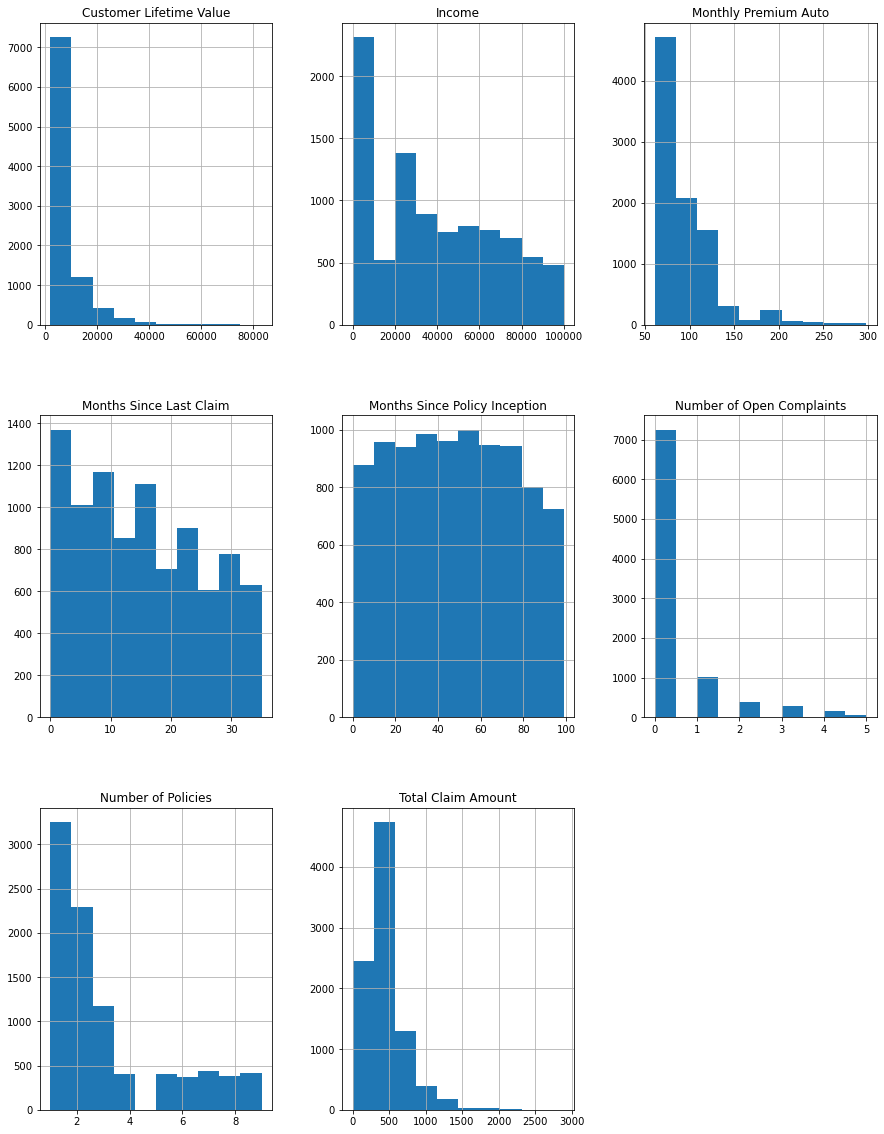

In [20]:
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
df.hist(ax=ax)
plt.show

Plotting boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Lifetime Value'>

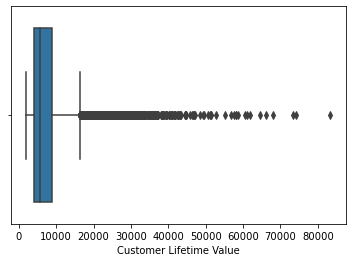

In [21]:
sns.boxplot(df["Customer Lifetime Value"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

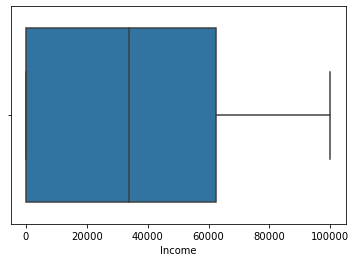

In [22]:
sns.boxplot(df['Income'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly Premium Auto'>

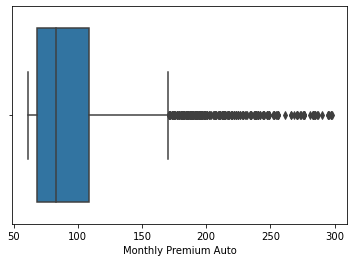

In [23]:
sns.boxplot(df['Monthly Premium Auto'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Months Since Last Claim'>

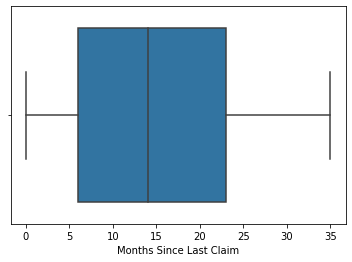

In [24]:
sns.boxplot(df['Months Since Last Claim'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Months Since Policy Inception'>

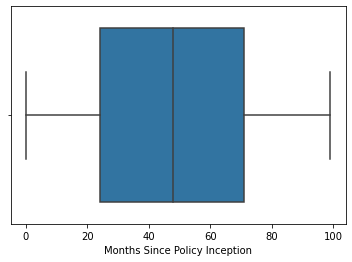

In [25]:
sns.boxplot(df['Months Since Policy Inception'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Policies'>

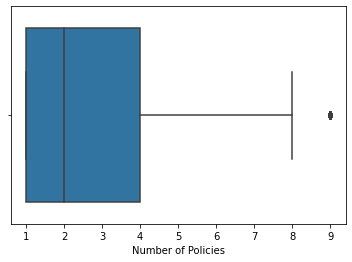

In [26]:
sns.boxplot(df['Number of Policies'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Claim Amount'>

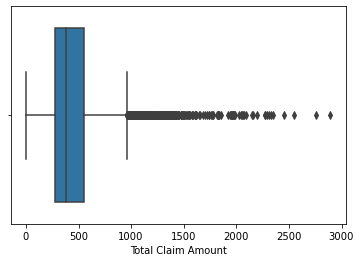

In [27]:
sns.boxplot(df['Total Claim Amount'])

From the boxplots it is very evident that there are outliers in the dataset so using the below custom function calculated the number of outliers in each variable.

In [28]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [29]:
sum(outlier_func(df["Customer Lifetime Value"]))

817

In [30]:
sum(outlier_func(df["Monthly Premium Auto"]))

430

In [31]:
sum(outlier_func(df["Number of Policies"]))

416

In [32]:
sum(outlier_func(df["Total Claim Amount"]))

453

In [33]:
num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [34]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["Customer Lifetime Value"])

df["Customer Lifetime Value"]= winsor.fit_transform(df[["Customer Lifetime Value"]])
sum(outlier_func(df["Customer Lifetime Value"]))

0

In [35]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["Monthly Premium Auto"])

df["Monthly Premium Auto"]= winsor.fit_transform(df[["Monthly Premium Auto"]])
sum(outlier_func(df["Monthly Premium Auto"]))

0

In [36]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["Number of Policies"])

df["Number of Policies"]= winsor.fit_transform(df[["Number of Policies"]])
sum(outlier_func(df["Number of Policies"]))

0

In [37]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["Total Claim Amount"])

df["Total Claim Amount"]= winsor.fit_transform(df[["Total Claim Amount"]])
sum(outlier_func(df["Total Claim Amount"]))

0

Again plotting boxplots to show the difference in the boxplots after rectifying the outliers.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Lifetime Value'>

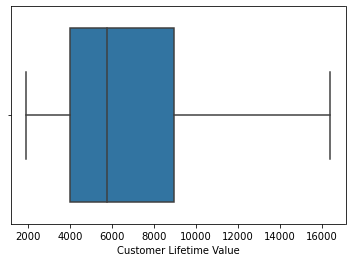

In [38]:
sns.boxplot(df["Customer Lifetime Value"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly Premium Auto'>

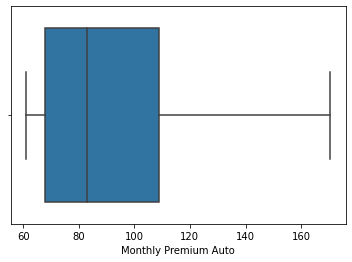

In [39]:
sns.boxplot(df["Monthly Premium Auto"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Policies'>

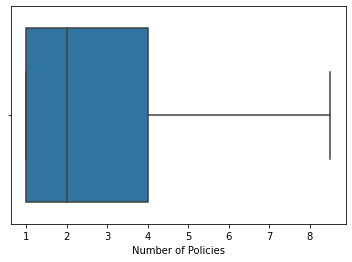

In [40]:
sns.boxplot(df["Number of Policies"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Claim Amount'>

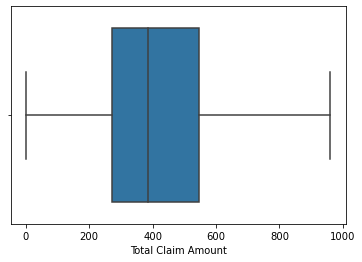

In [41]:
sns.boxplot(df["Total Claim Amount"])

Removing the Customer and Effective To Date columns as their clustering cannot help in the analysis.

In [43]:
df1=df.drop(['Customer','Effective To Date'],axis=1)
df1.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8.0,Personal Auto,Personal L3,Offer3,Agent,960.399730,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### COLUMN TRANSFORMER
Using the column transformer the categorical columns are one hot encoded and the numerical values are normalized using the minmax scaler.The column transformer help to do both at the same time without writing separate codes for both onehot encoding and scaling.

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
columntransformer=ColumnTransformer(transformers=[
    (' ',scaler,['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies','Total Claim Amount']),
    ('  ',OneHotEncoder(sparse=True,drop='first',dtype=np.int64),[ 'State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code','Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type','Sales Channel', 'Vehicle Class', 'Vehicle Size'])
    
],remainder="passthrough")

In [45]:
df2=pd.DataFrame(columntransformer.fit_transform(df1))
df2.columns=columntransformer.get_feature_names_out()
df2.head(2)

,__Customer Lifetime Value,__Income,__Monthly Premium Auto,__Months Since Last Claim,__Months Since Policy Inception,__Number of Open Complaints,__Number of Policies,__Total Claim Amount,__State_California,__State_Nevada,...,__Sales Channel_Branch,__Sales Channel_Call Center,__Sales Channel_Web,__Vehicle Class_Luxury Car,__Vehicle Class_Luxury SUV,__Vehicle Class_SUV,__Vehicle Class_Sports Car,__Vehicle Class_Two-Door Car,__Vehicle Size_Medsize,__Vehicle Size_Small
0,0.059625,0.562847,0.073059,0.914286,0.050505,0.0,0.000000,0.400616,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.350063,0.000000,0.301370,0.371429,0.424242,0.0,0.933333,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### DIMENSION REDUCTION USING PCA
In the belown cell the dataset is dimension reduced and the cummulative variance is also shown to get an idea about the percentage of data is retained.

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
pca_values=pca.fit_transform(df2)
var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([10.51, 16.11, 21.55, 26.48, 31.11, 35.55, 39.77, 43.92, 47.88,
       51.71, 55.44, 58.79, 61.81, 64.42, 66.92, 69.36, 71.57, 73.66,
       75.7 , 77.61])

Text(0, 0.5, 'Percentage of Data')

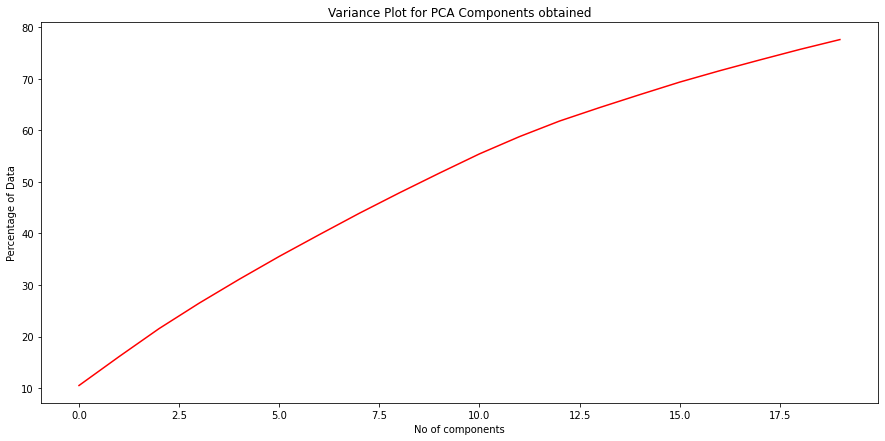

In [47]:
plt.figure(figsize=(15,7))
plt.plot(var1,color='red')
plt.title("Variance Plot for PCA Components obtained")
plt.xlabel("No of components")
plt.ylabel("Percentage of Data")

Fitting the dimension reduced values into a dataframe.

In [48]:
df3=pd.DataFrame(pca_values)
df3.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.459826,0.848001,0.243675,0.434609,-0.117772,-0.133256,-0.382193,0.236831,0.494704,-0.585020,-0.191831,-0.087641,-0.849308,-0.113889,0.126899,0.653789,0.350159,0.046653,0.378813,-0.196456
1,1.420444,-0.539336,-0.757813,0.022878,0.056005,-0.058927,-0.585585,-0.529161,0.213289,0.153489,0.023964,0.595955,-0.236326,0.103410,0.119027,0.152131,0.247317,-0.727528,-0.150647,-0.358317
2,-0.394672,-0.683626,-0.054377,-0.011665,-0.211555,-0.239894,-0.302416,-0.040396,0.272800,-0.291586,-0.153362,-0.332050,-0.865760,-0.083039,0.233161,0.659847,0.445494,0.097287,0.925201,-0.342071


### DENDROGRAM
Using the dendrogram to get an idea about the clusters to decide which method to use for clustering.<br>
__Note__: The single and average methods were making the kernel to go dead so couldn't show it here.

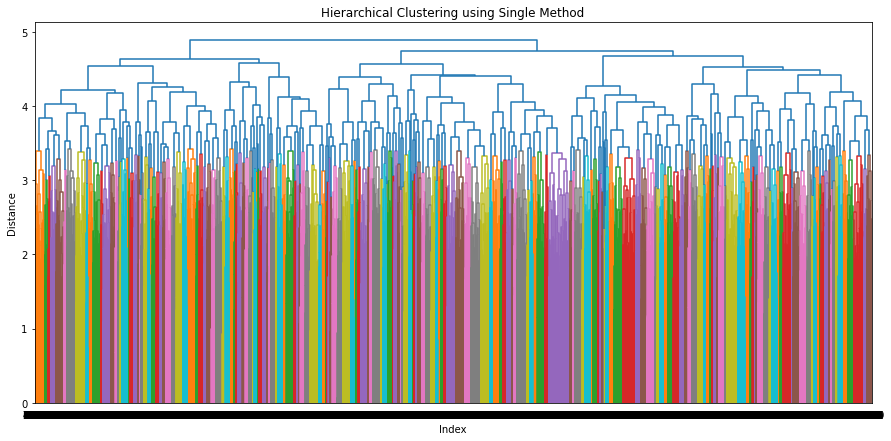

In [64]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df3,method='complete',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchical Clustering using Single Method"); plt.xlabel("Index");plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

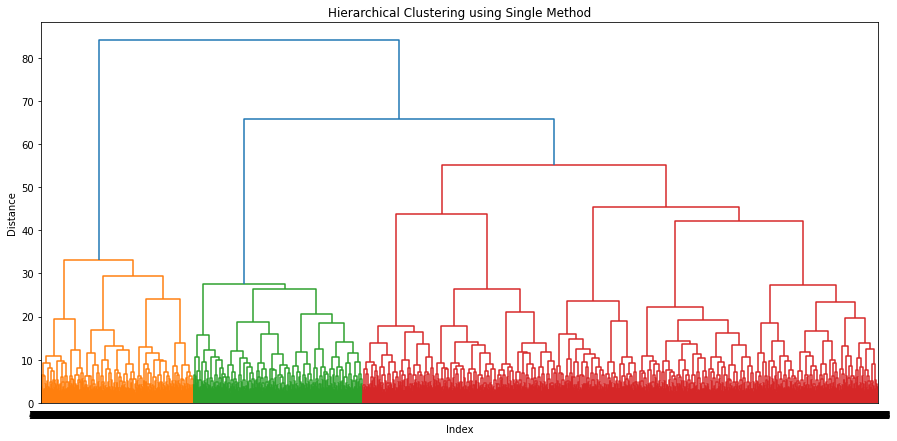

In [49]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df3,method='ward',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchical Clustering using Single Method"); plt.xlabel("Index");plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

* From the dendrogram it is clear that ward method gives a dendrogram where the clusters are distributed in an even manner which would be better for clustering.
* In the below steps clusters ranging from 2 to 4 are done using the ward method and will try to get insights from them.

### NO OF CLUSTERS : 2

In [50]:
from sklearn.cluster import AgglomerativeClustering
df3_ward2=AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean').fit(df3)
clust_ward=pd.Series(df3_ward2.labels_)
df4_ward2=df.copy()
df4_ward2['clust']=clust_ward
df4_ward2.groupby(df4_ward2.clust).mean()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
clust,,,,,,,,
0,7256.094461,45567.936011,91.244712,15.045649,48.110308,0.382062,2.927309,375.984048
1,6869.692015,2145.448918,92.616587,15.327524,47.859375,0.394832,3.015625,608.385671


In [51]:
df4_num2=df4_ward2.select_dtypes(exclude='number')
df4_num2['clust']=df4_ward2['clust']
df4_num2.groupby(df4_num2.clust).agg([pd.Series.mode]).T

,clust,0,1
Customer,mode,"[AA11235, AA16582, AA34092, AA35519, AA56476, ...","[AA10041, AA30683, AB13432, AB26022, AC13887, ..."
State,mode,California,California
Response,mode,No,No
Coverage,mode,Basic,Basic
Education,mode,Bachelor,High School or Below
Effective To Date,mode,10/1/2011,1/17/11
EmploymentStatus,mode,Employed,Unemployed
Gender,mode,F,M
Location Code,mode,Suburban,Suburban
Marital Status,mode,Married,Single


In [52]:
df4_ward2.groupby(df4_ward2.clust).count()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
clust,,,,,,,,,,,,,,,,,,,,,
0,7470,7470,7470,7470,7470,7470,7470,7470,7470,7470,...,7470,7470,7470,7470,7470,7470,7470,7470,7470,7470
1,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,...,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664


Text(0, 0.5, 'Total Claim Amount')

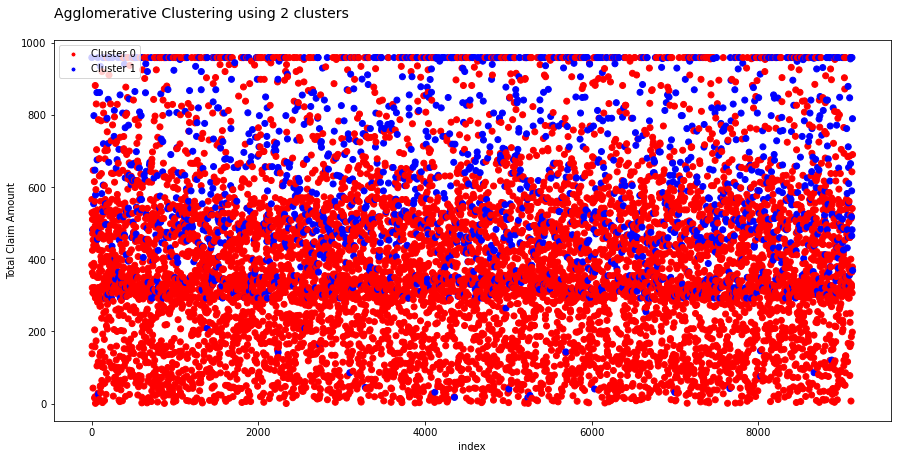

In [54]:
plt.figure(figsize=(15,7))
a2 = df4_ward2.clust.map({0:'red', 1:'blue'})
plt.scatter(df4_ward2.index,df4_ward2['Total Claim Amount'], c=a2)

from matplotlib.lines import Line2D
colors=['red','blue']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Agglomerative Clustering using 2 clusters\n', loc='left', fontsize=14)
plt.xlabel('index')
plt.ylabel('Total Claim Amount')

#### INSIGHTS
* Cluster 0 : In this group of customers majority are employed , bachelor educated, married and females. This group has a higher income and the insurance value is also relatively little higher but they have a low claim amount.
* Cluster 1 : In this group of customers majority are unemployed, high school educated, single and males. This group has a lower income and the insurance value is also relatively little lower but they have a high claim amount.

### NO OF CLUSTERS : 3

In [55]:
df3_ward3=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean').fit(df3)
clust_ward=pd.Series(df3_ward3.labels_)
df4_ward3=df.copy()
df4_ward3['clust']=clust_ward
df4_ward3.groupby(df4_ward3.clust).mean()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
clust,,,,,,,,
0,7254.602508,45037.158391,91.353177,14.937177,48.078662,0.385656,2.920448,378.801933
1,6869.692015,2145.448918,92.616587,15.327524,47.859375,0.394832,3.015625,608.385671
2,7260.623516,47179.194489,90.915451,15.374932,48.206375,0.371151,2.948136,367.429916


In [56]:
df4_num3=df4_ward3.select_dtypes(exclude='number')
df4_num3['clust']=df4_ward3['clust']
df4_num3.groupby(df4_num3.clust).agg([pd.Series.mode]).T

,clust,0,1,2
Customer,mode,"[AA11235, AA16582, AA34092, AA35519, AA69265, ...","[AA10041, AA30683, AB13432, AB26022, AC13887, ...","[AA56476, AB60627, AC22873, AC24378, AC42963, ..."
State,mode,California,California,California
Response,mode,No,No,No
Coverage,mode,Basic,Basic,Basic
Education,mode,Bachelor,High School or Below,College
Effective To Date,mode,1/27/11,1/17/11,2/26/11
EmploymentStatus,mode,Employed,Unemployed,Employed
Gender,mode,F,M,F
Location Code,mode,Suburban,Suburban,Suburban
Marital Status,mode,Married,Single,Married


In [57]:
df4_ward3.groupby(df4_ward3.clust).count()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
clust,,,,,,,,,,,,,,,,,,,,,
0,5619,5619,5619,5619,5619,5619,5619,5619,5619,5619,...,5619,5619,5619,5619,5619,5619,5619,5619,5619,5619
1,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,...,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664
2,1851,1851,1851,1851,1851,1851,1851,1851,1851,1851,...,1851,1851,1851,1851,1851,1851,1851,1851,1851,1851


Text(0, 0.5, 'Total Claim Amount')

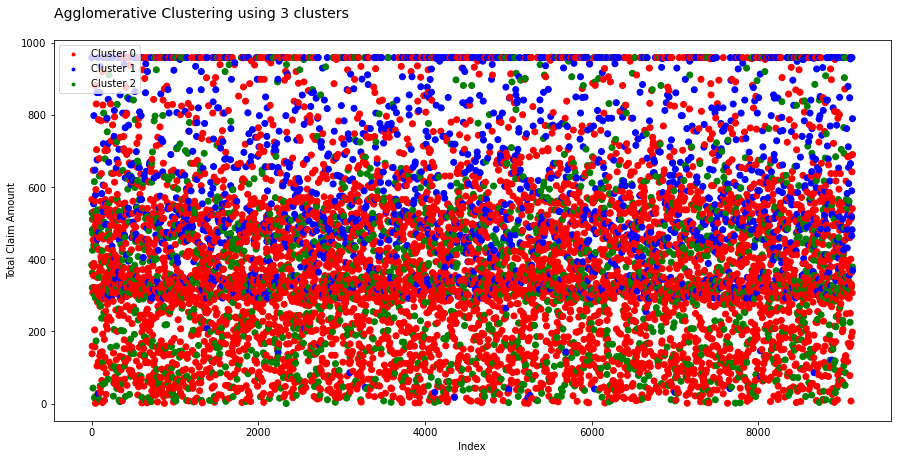

In [58]:
plt.figure(figsize=(15,7))
a3 = df4_ward3.clust.map({0:'red', 1:'blue', 2:'green'})
plt.scatter(df4_ward3.index,df4_ward3['Total Claim Amount'], c=a3)

from matplotlib.lines import Line2D
colors=['red','blue','green']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Agglomerative Clustering using 3 clusters\n', loc='left', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Total Claim Amount')

#### INSIGHTS
* Cluster 0 : In this group of customers majority are employed , bachelor educated, married and females. This group has a higher income and the insurance value is also relatively  higher but they have a low claim amount. Majority of the customer belongs to this group.
* Cluster 1 : In this group of customers majority are unemployed, high school educated, single and males. This group has a lower income and the insurance value is also relatively little lower but they have a high claim amount.
* Cluster 2 : In this group of customers majority are employed, college educated, married and females. This group has a higher income and the insurance value is also relatively higher but they have a low claim amount.

### NO OF CLUSTERS : 4

In [59]:
df3_ward4=AgglomerativeClustering(n_clusters=4,linkage='ward',affinity='euclidean').fit(df3)
clust_ward=pd.Series(df3_ward4.labels_)
df4_ward4=df.copy()
df4_ward4['clust']=clust_ward
df4_ward4.groupby(df4_ward4.clust).mean()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
clust,,,,,,,,
0,7263.695936,44114.717546,91.998003,14.825107,48.446220,0.381170,2.912981,393.815907
1,7239.525657,46566.560076,90.284059,15.122990,47.469253,0.393094,2.932829,353.908849
2,7260.623516,47179.194489,90.915451,15.374932,48.206375,0.371151,2.948136,367.429916
3,6869.692015,2145.448918,92.616587,15.327524,47.859375,0.394832,3.015625,608.385671


In [60]:
df4_num4=df4_ward4.select_dtypes(exclude='number')
df4_num4['clust']=df4_ward4['clust']
df4_num4.groupby(df4_num4.clust).agg([pd.Series.mode]).T

,clust,0,1,2,3
Customer,mode,"[AA11235, AA16582, AA34092, AB21519, AB31813, ...","[AA35519, AA69265, AA71604, AA93585, AB23825, ...","[AA56476, AB60627, AC22873, AC24378, AC42963, ...","[AA10041, AA30683, AB13432, AB26022, AC13887, ..."
State,mode,California,California,California,California
Response,mode,No,No,No,No
Coverage,mode,Basic,Basic,Basic,Basic
Education,mode,Bachelor,Bachelor,College,High School or Below
Effective To Date,mode,2/19/11,1/27/11,2/26/11,1/17/11
EmploymentStatus,mode,Employed,Employed,Employed,Unemployed
Gender,mode,F,M,F,M
Location Code,mode,Suburban,Suburban,Suburban,Suburban
Marital Status,mode,Married,Married,Married,Single


In [61]:
df4_ward4.groupby(df4_ward4.clust).count()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
clust,,,,,,,,,,,,,,,,,,,,,
0,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505,...,3505,3505,3505,3505,3505,3505,3505,3505,3505,3505
1,2114,2114,2114,2114,2114,2114,2114,2114,2114,2114,...,2114,2114,2114,2114,2114,2114,2114,2114,2114,2114
2,1851,1851,1851,1851,1851,1851,1851,1851,1851,1851,...,1851,1851,1851,1851,1851,1851,1851,1851,1851,1851
3,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,...,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664


Text(0, 0.5, 'Total Claim Amount')

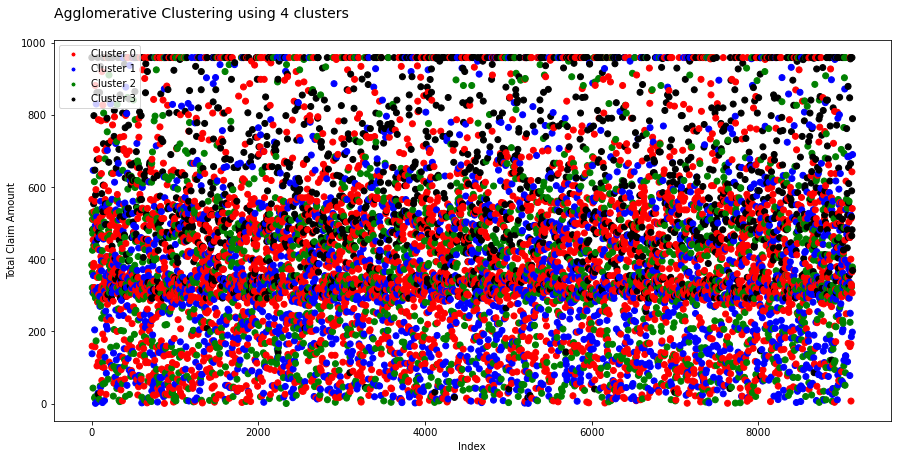

In [63]:
plt.figure(figsize=(15,7))
a4 = df4_ward4.clust.map({0:'red', 1:'blue', 2:'green',3:'black'})
plt.scatter(df4_ward4.index,df4_ward4['Total Claim Amount'], c=a4)

from matplotlib.lines import Line2D
colors=['red','blue','green','black']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Agglomerative Clustering using 4 clusters\n', loc='left', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Total Claim Amount')

#### INSIGHTS
* Cluster 0 : In this group of customers majority are employed, bachelor educated, married and females. This group has a higher income and the insurance value is also relatively higher but they also have a low claim amount.
* Cluster 1 : In this group of customers majority are employed, bachelor educated, married and males. This group has a higher income and the insurance value is also relatively higher but they also have a low claim amount.
* Cluster 2 : In this group of customers majority are employed, college educated, married and females. This group has a higher income and the insurance value is also relatively higher but they also have a low claim amount.
* Cluster 3 : In this group of customers majority are unemployed, high school educated, single and males. This group has a lower income and the insurance value is also relatively little lower but they have a high claim amount.

## CONCLUSION
From the above insights the customers can be grouped into these segments:
* __High Income Low Claim__ : This segment of customers are high value customers with a very high income who are employed and married and majority of the customers are females.

* __Low Income High Claim__ : This segment of customers are relatively little lower value customers with  low income who are not employed and are single and majority of the customers are male

### BENEFIT
From the above analysis of the customer segments we can benefit if we do the following
* Improve and Maintain the quality of service provided to the high income and low claim segments to avoind churn.
* Implement concentrated marketing tactics to attract more customers of the high income group. 